In [77]:
# import the required packages
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import random
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
%matplotlib inline

from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [78]:
# import the pacakges

import math
import scipy.stats as stats
from scipy.stats import percentileofscore

from sklearn.model_selection import train_test_split
import feature_engine.imputation as mdi
from feature_engine.encoding import OneHotEncoder, MeanEncoder, OrdinalEncoder
from feature_engine.discretisation import EqualFrequencyDiscretiser
from feature_engine.outliers import Winsorizer
from feature_engine.outliers import ArbitraryOutlierCapper
from feature_engine.transformation import BoxCoxTransformer
from sklearn.preprocessing import PowerTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler

from sklearn.preprocessing import PolynomialFeatures

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# do pipelines, using sklearn method
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer,ArbitraryNumberImputer,RandomSampleImputer

from feature_engine.discretisation import EqualFrequencyDiscretiser
from sklearn.preprocessing import StandardScaler

from feature_engine.encoding import RareLabelEncoder
from sklearn.decomposition import PCA

## 1. HR Analytics

### 1.1 Load and Sample the data
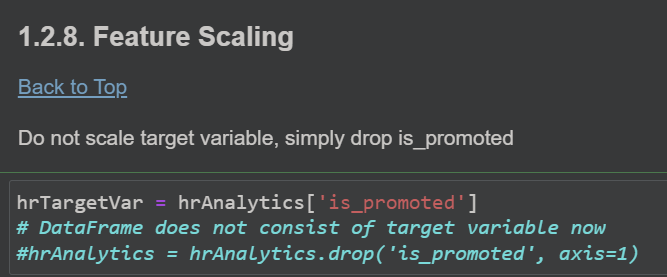

In [79]:
hrAnalytics = pd.read_csv("hr_analytics_final.csv", index_col=0)  # Sets the first column as the index

In [80]:
hrAnalytics

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel,is_promoted
0,2,1.773944,3.0,1.982565,0,1,8.504646,0.545261,0.568111,0.483996,0.511328,0.490783,1
1,1,1.889349,3.0,1.657689,0,0,8.212837,0.510224,0.594470,0.483996,0.494974,0.490783,1
2,1,1.853255,4.0,2.930616,0,0,7.462329,0.510224,0.638961,0.540015,0.494974,0.508370,0
3,1,1.773944,4.0,0.757014,1,0,8.778835,0.540456,0.481969,0.483996,0.511328,0.508370,1
4,1,1.848017,3.0,1.657689,0,0,6.972422,0.464040,0.624242,0.483996,0.494974,0.508370,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9331,1,1.824973,3.0,1.657689,1,0,8.081678,0.540456,0.652695,0.540015,0.511328,0.490783,1
9332,1,1.881174,5.0,2.729289,1,0,7.662668,0.510224,0.638961,0.540015,0.511328,0.508370,1
9333,2,1.782295,4.0,1.657689,1,0,8.381898,0.544681,0.568111,0.483996,0.494974,0.490783,1
9334,1,1.797826,3.0,1.264795,0,0,7.711298,0.339744,0.481969,0.483996,0.494974,0.508370,0


In [81]:
hrAnalytics.describe()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel,is_promoted
count,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000,9336.000000
mean,1.228578,1.821233,3.644494,2.223744,0.505677,0.066945,7.836080,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
std,0.559690,0.038996,1.175499,0.817978,0.499995,0.249940,0.649356,0.045371,0.087498,0.025827,0.007546,0.013475,0.500027
min,1.000000,1.700528,1.000000,0.757014,0.000000,0.000000,6.413336,0.339744,0.235294,0.462069,0.494974,0.490783,0.000000
25%,1.000000,1.790246,3.000000,1.657689,0.000000,0.000000,7.251839,0.464040,0.464539,0.483996,0.494974,0.490783,0.000000
50%,1.000000,1.818616,4.000000,2.261834,1.000000,0.000000,7.759378,0.510224,0.481969,0.483996,0.494974,0.490783,0.500000
75%,1.000000,1.848017,5.000000,2.729289,1.000000,0.000000,8.504646,0.544681,0.568111,0.540015,0.511328,0.508370,1.000000
max,8.000000,1.889349,5.000000,3.598823,1.000000,1.000000,8.778835,0.545261,0.652695,0.540015,0.511328,0.563265,1.000000


In [82]:
hrAnalytics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9336 entries, 0 to 9335
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   no_of_trainings       9336 non-null   int64  
 1   age                   9336 non-null   float64
 2   previous_year_rating  9336 non-null   float64
 3   length_of_service     9336 non-null   float64
 4   KPIs_met >80%         9336 non-null   int64  
 5   awards_won?           9336 non-null   int64  
 6   avg_training_score    9336 non-null   float64
 7   department            9336 non-null   float64
 8   region                9336 non-null   float64
 9   education             9336 non-null   float64
 10  gender                9336 non-null   float64
 11  recruitment_channel   9336 non-null   float64
 12  is_promoted           9336 non-null   int64  
dtypes: float64(9), int64(4)
memory usage: 1021.1 KB


In [83]:
# Set the "Survived" as target/model output and the rest features as model inputs
y_data = hrAnalytics['is_promoted']
X_data = hrAnalytics.drop(['is_promoted'], axis=1)

In [84]:
# Split the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=2)

### Understanding Information Gain (IG) of Feature and Target

Using Scikit learn's nutual information classifier module, `mutual_info_classif`, it calculates the mutual information between each feature, and the target variable. It measures the amount of information obtained about one random variable, thorugh observing another variable. Hence, in the context of feature selection, it can measure the dependence between feature and target.

This is especually useful for decision trees, since it uses things like information gain to determine splitting of features.

In [85]:
from sklearn.feature_selection import mutual_info_classif

X = hrAnalytics.drop('is_promoted', axis=1)
y = hrAnalytics['is_promoted']

mutual_info = mutual_info_classif(X, y)

To interpret the features, we see the scale of 0 to 1. 0 indicates no mutual information (irrelevant), and 1 indicates the perfect dependence. Hence, the closer to 1, the more relevance it holds between feature and target.

In [86]:
# feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Mutual_Info_Score': mutual_info})

# # Print the feature importance DataFrame
# print(feature_importance_df)

# # Define thresholds for relevance
# highly_relevant_threshold = 0.05
# moderately_relevant_threshold = 0.02

# # Categorize features based on thresholds
# highly_relevant_features = feature_importance_df[feature_importance_df['Mutual_Info_Score'] >= highly_relevant_threshold]['Feature']
# moderately_relevant_features = feature_importance_df[(feature_importance_df['Mutual_Info_Score'] >= moderately_relevant_threshold) &
#                                                     (feature_importance_df['Mutual_Info_Score'] < highly_relevant_threshold)]['Feature']
# not_relevant_features = feature_importance_df[feature_importance_df['Mutual_Info_Score'] < moderately_relevant_threshold]['Feature']

# # Print the categorized features
# print("Highly Relevant Features:", highly_relevant_features.tolist())
# print("Moderately Relevant Features:", moderately_relevant_features.tolist())
# print("Not Relevant Features:", not_relevant_features.tolist())

We analyse that there is a threshold for the features to be relevant to the target variable. Features with relatively higher scores, which is more than 0.05, are:
- kpis met
- avg training score
- previous year rating (almost)
- awards won (almost)

Hence these are key factors that influence promotion

We can keep the more relevant ones (we now have only 4 columns)

In [87]:
# feature_columns = ['previous_year_rating', 
#                    'KPIs_met >80%', 
#                    'awards_won?', 
#                    'avg_training_score']

# # Filter the DataFrame to keep only the selected features
# X_train = X_train[feature_columns]
# X_test = X_test[feature_columns]

In [88]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department,region,education,gender,recruitment_channel
6274,1,1.811987,4.0,1.264795,0,0,8.584672,0.545261,0.594470,0.540015,0.494974,0.490783
7665,1,1.811987,5.0,1.264795,1,0,7.086529,0.464040,0.596899,0.483996,0.494974,0.490783
202,1,1.836940,5.0,1.264795,1,0,7.142386,0.464040,0.481969,0.540015,0.494974,0.508370
2776,1,1.831075,3.0,1.264795,1,0,8.702148,0.545261,0.481969,0.540015,0.494974,0.490783
7175,3,1.842582,5.0,3.448084,1,0,7.613472,0.510224,0.594470,0.540015,0.511328,0.490783


### 1.2 Build the Model(s)

Types of models to be used:
- Logistic Regression
- Decision Tree Classifier
- Random Forest
- Artificial Neural Network (ANN)
- Support vector machines (SVM)

In [89]:
# Imports needed for this Practical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn import tree

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV


Logistic Regression

In [90]:
# Logistic Regression - Create model "lg"
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(X_train[['']], y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Decision Tree

In [91]:

decision_tree = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

Random Forest

In [92]:

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Neural Network

In [93]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

### Support Vector Classifier

In [94]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
X_train.columns

# plot_classifier(X_train, y_train, svm, lims=(11, 15, 0, 6))

# plt.show()

Index(['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department',
       'region', 'education', 'gender', 'recruitment_channel'],
      dtype='object')

Evaluating Decision Tree

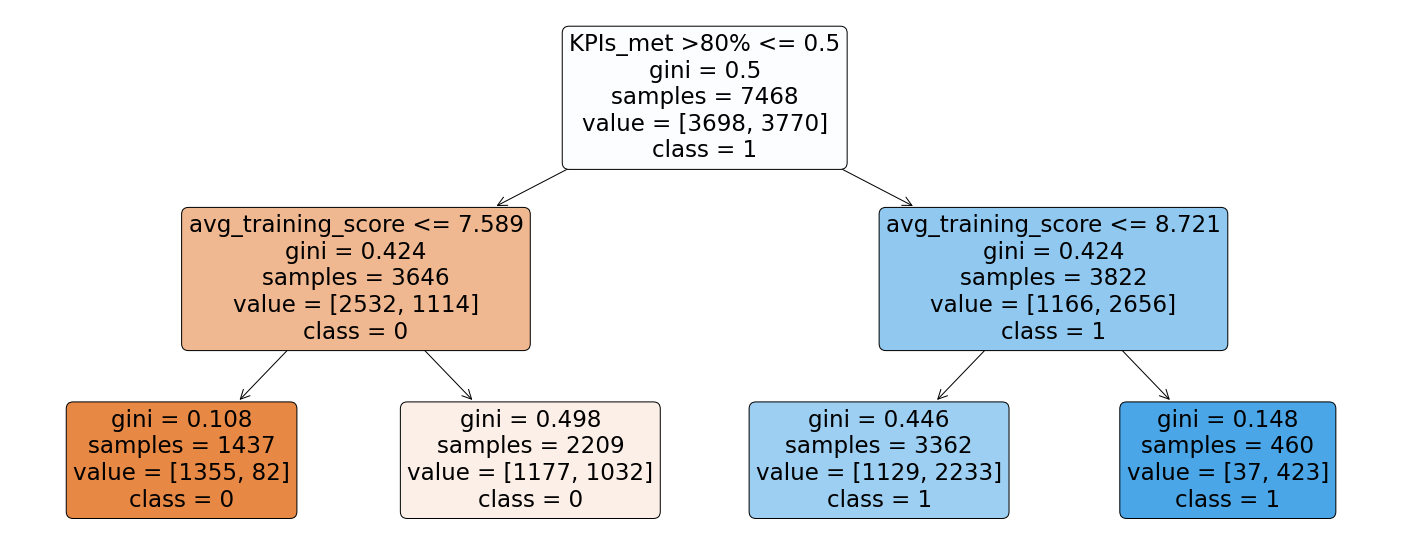

In [95]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(hrAnalytics.drop(['is_promoted'], axis=1)),
                class_names = ['0','1'],
                rounded = True,
                filled= True)
plt.savefig('tree1.png',format='png')
plt.show()              

In [96]:
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6946973754686663
the testing accuracy is:  0.686830835117773


In [97]:
from sklearn.model_selection import cross_val_score, cross_validate

# Evaluate the Model using K-folds Cross validation
results  = cross_validate(decision_tree, X_data, y_data, scoring='accuracy', cv=5, return_train_score = True)
print('train_score: ', results['train_score'])
print('test_score: ', results['test_score'])

train_score:  [0.69175147 0.69487214 0.69500602 0.6912572  0.69272995]
test_score:  [0.69860814 0.68612748 0.68559186 0.70058918 0.69469738]


### Evaluating Log Reg

In [98]:
#training acc
train_acc = lg.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = lg.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7311194429566149
the testing accuracy is:  0.7323340471092077


### Evalutuating Random Forest

In [99]:
#training acc
train_acc = rf.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = rf.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  1.0
the testing accuracy is:  0.8126338329764454


### Evaluating Neural Network

In [100]:
#training acc
train_acc = nn.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = nn.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7599089448312801
the testing accuracy is:  0.7532119914346895


### Evaluating Support Vector Classifier

In [101]:
#training acc
train_acc = svm.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = svm.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7194697375468666
the testing accuracy is:  0.7077087794432548


### 1.3 Evaluate and Improve the Model(s)

Improving the logistic regression model, using grid search. We grid search through multiple params in the 'solver' hyperparameter

In [102]:
param_grid = {
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
    }

grid = GridSearchCV(lg, param_grid, scoring='accuracy', cv= 10, n_jobs=-1, verbose=3)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


c:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

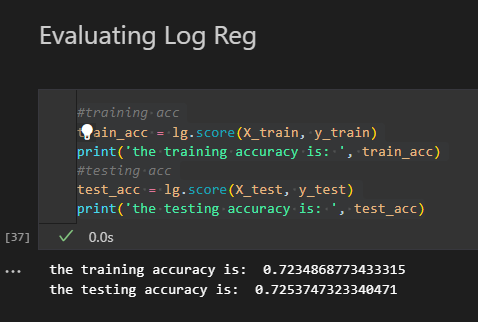

In [103]:
print('Best Estimator:', grid.best_estimator_)
print('Best Score:', grid.best_score_)
print('Best Parameters:', grid.best_params_)

Best Estimator: LogisticRegression(solver='sag')
Best Score: 0.729647993224013
Best Parameters: {'solver': 'sag'}


Since the newton cg is the best param, we go further to use this value obtained

In [104]:
lg = LogisticRegression(solver=grid.best_params_['solver'], max_iter=10000)
lg.fit(X_train,y_train)

LogisticRegression(max_iter=10000, solver='sag')

In [105]:
#training acc
train_acc = lg.score(X_train, y_train)
print('the training accuracy is: ', train_acc)
#testing acc
test_acc = lg.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.7300482056775576
the testing accuracy is:  0.7296573875802997


Lastly, we obtain the p values for the logistic regression model

In [107]:
lg2 = sm.Logit(y_train, X_train).fit()
print(lg2.summary())

Optimization terminated successfully.
         Current function value: 0.515472
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            is_promoted   No. Observations:                 7468
Model:                          Logit   Df Residuals:                     7456
Method:                           MLE   Df Model:                           11
Date:                Tue, 23 Jan 2024   Pseudo R-squ.:                  0.2563
Time:                        23:00:26   Log-Likelihood:                -3849.5
converged:                       True   LL-Null:                       -5176.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
no_of_trainings         -0.1993      0.052     -3.815      0.000      -0.302      -0.097

In [169]:
# Get High P-Values (High confidence)
threshold = 0.05
cols = [i for i in lg2.pvalues.index if lg2.pvalues[i] <= threshold]
print(f"Features with P-Score <= {threshold}: {cols}")

# Redefine X and y
X2 = hrAnalytics[cols]
y2 = hrAnalytics["is_promoted"]

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X2,y2, test_size=0.2, random_state=1)

Features with P-Score <= 0.05: ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'department', 'region', 'education', 'gender']


In [170]:
majority_class = hrAnalytics[hrAnalytics['is_promoted'] == 0]
minority_class = hrAnalytics[hrAnalytics['is_promoted'] == 1]

minority_class.count()

no_of_trainings         4668
age                     4668
previous_year_rating    4668
length_of_service       4668
KPIs_met >80%           4668
awards_won?             4668
avg_training_score      4668
department              4668
region                  4668
education               4668
gender                  4668
recruitment_channel     4668
is_promoted             4668
dtype: int64

Hence we accept the null hypothesis

In [171]:
xlabel = X_train_cols.columns[0]
ylabel = X_train_cols.columns[1]
xlabel

'length_of_service'

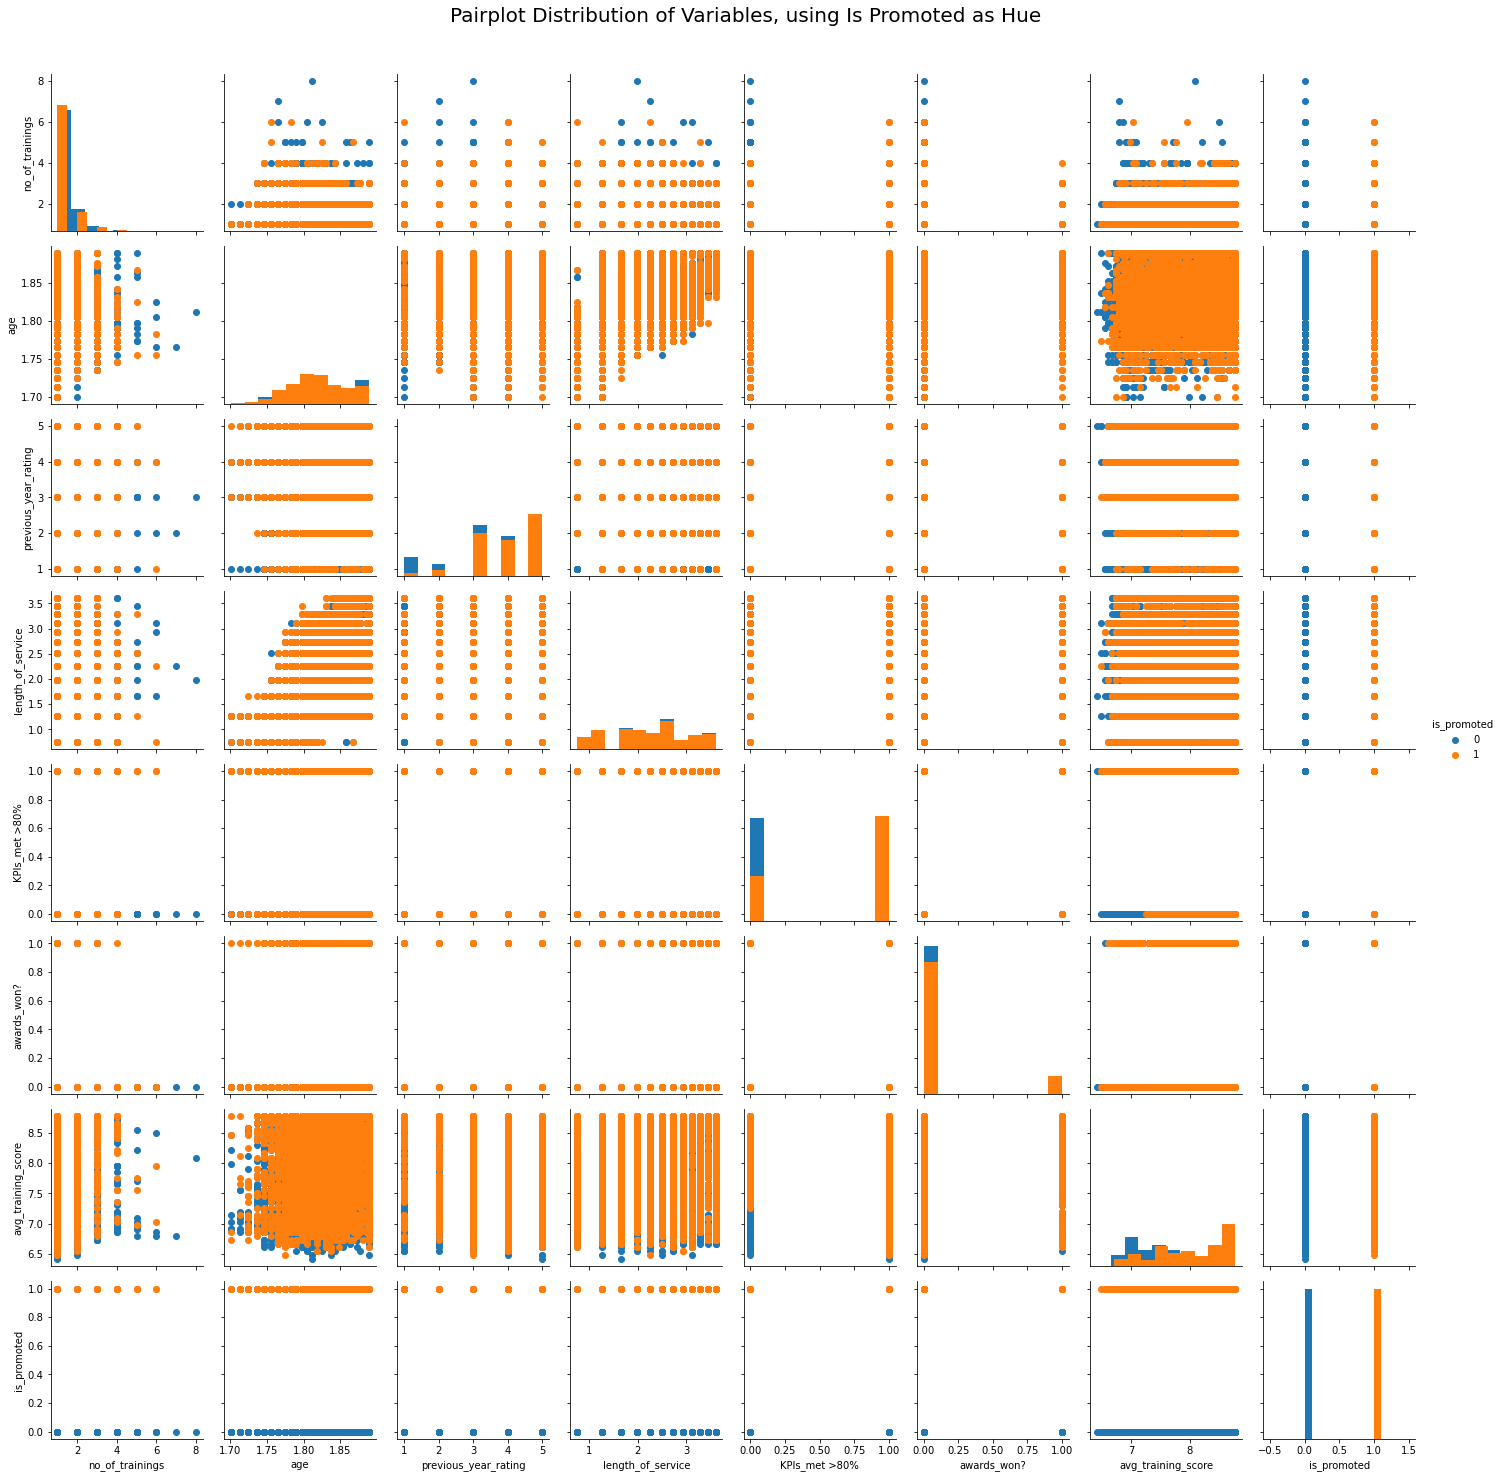

In [172]:
g = sns.PairGrid(data=hrAnalytics, vars=['no_of_trainings', 'age', 'previous_year_rating',
                                'length_of_service', 'KPIs_met >80%', 'awards_won?',
                                'avg_training_score', 'is_promoted'],
                 hue='is_promoted')

g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

# Add a legend
g.add_legend()

# Show the plot
g.fig.suptitle('Pairplot Distribution of Variables, using Is Promoted as Hue', y=1.03, fontsize=20)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

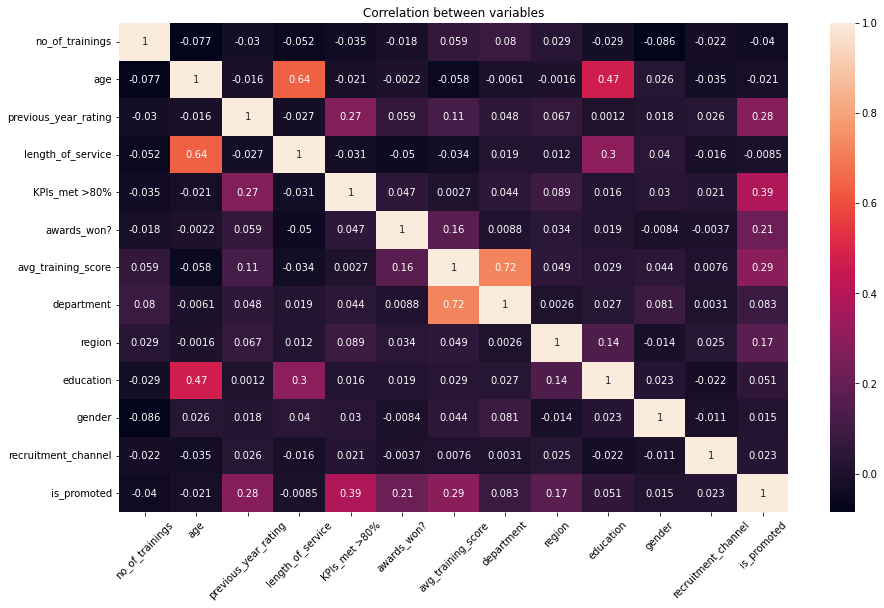

In [173]:
#checking for correlation using spearman method
plt.figure(figsize=(15,9))
correlation_matrix=hrAnalytics.corr(method = 'spearman')
sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables')
plt.show

Hence, we choose our columns for comparison for logistic regression, namely:
- length of service
- age

The second x columns are:
- avg training score
- department

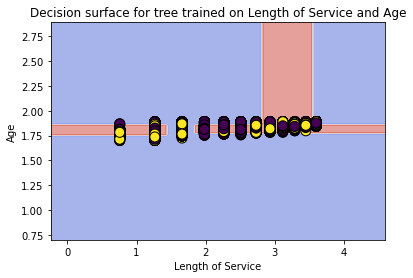

In [174]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

# Choosing the columns for the plot
X_train_cols = X_train[['length_of_service', 'age']]
xlabel = 'Length of Service'
ylabel = 'Age'

SEED = 42
# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=4, 
                                    random_state=SEED).fit(X_train_cols, y_train)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=xlabel, ylabel=ylabel,
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Plotting the data points    
disp.ax_.scatter(X_train['length_of_service'], X_train['age'], c=y_train, edgecolors='k', marker='o', s=100, linewidth=1)

plt.title(f"Decision surface for tree trained on {xlabel} and {ylabel}")
plt.show()


Since the decision boundary is making the data points too narrow, we try to adjust the plot

In [175]:
X_train['length_of_service'][y_train == 1].count()

3721

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 576x432 with 0 Axes>

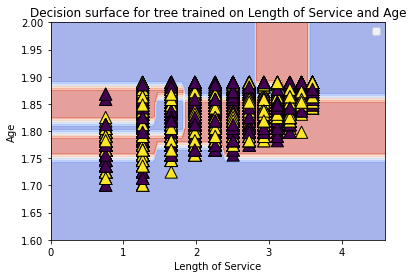

In [193]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

# Choosing the columns for the plot
X_train_cols = X_train[['length_of_service', 'age']]
xlabel = 'Length of Service'
ylabel = 'Age'

SEED = 42
# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=6, 
                                    random_state=SEED).fit(X_train_cols, y_train)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=xlabel, ylabel=ylabel,
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Customizing the size and spread of data points with different colors for each class
disp.ax_.scatter(X_train['length_of_service'], X_train['age'], c=y_train, edgecolors='k', marker='^', s=150, linewidth=1)
#disp.ax_.scatter(X_train['length_of_service'][y_train == 1], X_train['age'][y_train == 1], c='red', edgecolors='k', marker='^', s=150, linewidth=1, label='Class 1')

# Manually set the limits of the axes
disp.ax_.set_xlim(0, 4.6)  # Adjust the range based on your data
disp.ax_.set_ylim(1.6, 2)  # Adjust the range based on your data

# Add legend
disp.ax_.legend()

plt.title(f"Decision surface for tree trained on {xlabel} and {ylabel}")
plt.show()


<Figure size 576x432 with 0 Axes>

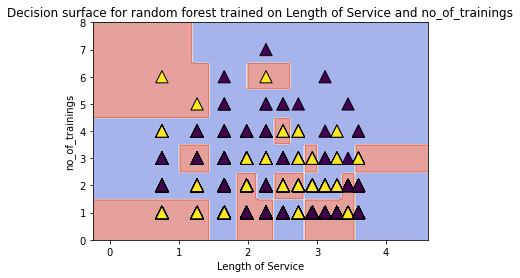

In [189]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

# Choosing the columns for the plot
X_train_cols = X_train[['length_of_service', 'no_of_trainings']]
xlabel = 'Length of Service'
ylabel = 'no_of_trainings'

SEED = 42
# Creating and fitting the tree classifier
classifier = rf.fit(X_train_cols, y_train)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=xlabel, ylabel=ylabel,
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Customizing the size and spread of data points with different colors for each class
disp.ax_.scatter(X_train['length_of_service'], X_train['no_of_trainings'], c=y_train, edgecolors='k', marker='^', s=150, linewidth=1)

# No need for legend in this case
# disp.ax_.legend()

plt.title(f"Decision surface for random forest trained on {xlabel} and {ylabel}")
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 576x432 with 0 Axes>

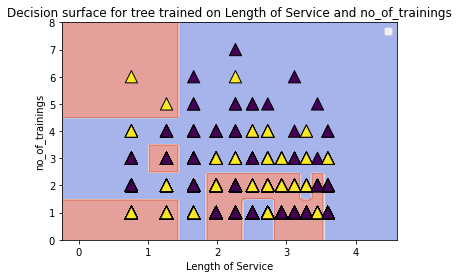

In [188]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

# Choosing the columns for the plot
X_train_cols = X_train[['length_of_service', 'no_of_trainings']]
xlabel = 'Length of Service'
ylabel = 'no_of_trainings'

SEED = 42
# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=6, 
                                    random_state=SEED).fit(X_train_cols, y_train)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=xlabel, ylabel=ylabel,
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

# Customizing the size and spread of data points with different colors for each class
disp.ax_.scatter(X_train['length_of_service'], X_train['no_of_trainings'], c=y_train, edgecolors='k', marker='^', s=150, linewidth=1)

# No need for legend in this case
disp.ax_.legend()

plt.title(f"Decision surface for tree trained on {xlabel} and {ylabel}")
plt.show()


As we can see in the resulting plot, the two classes cannot be perfectly separated by a linear decision boundary

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 576x432 with 0 Axes>

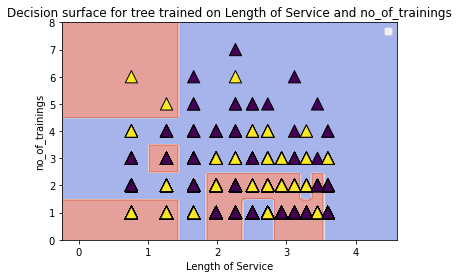

In [194]:
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier 

# Choosing the columns for the plot
X_train_cols = X_train[['length_of_service', 'no_of_trainings']]
xlabel = 'Length of Service'
ylabel = 'no_of_trainings'

SEED = 42
# Creating and fitting the tree classifier
classifier = DecisionTreeClassifier(max_depth=6, 
                                    random_state=SEED).fit(X_train_cols, y_train)

# Set the figure size
plt.figure(figsize=(8, 6))

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(classifier, 
                                              X_train_cols, 
                                              response_method="predict",
                                              xlabel=xlabel, ylabel=ylabel,
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)

disp.ax_.scatter(X_train['length_of_service'], X_train['no_of_trainings'], c=y_train, edgecolors='k', marker='^', s=150, linewidth=1)
# Adding legend
disp.ax_.legend()

plt.title(f"Decision surface for tree trained on {xlabel} and {ylabel}")
plt.show()


Or, we can even use a custom function for this:

In [182]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Extracting the two columns as NumPy arrays
    X = X.values
    
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)] * sum(y == cl),
                    marker=markers[idx], label=cl)
    
    # Highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o', s=100, label='test set')


In [196]:
lg.fit(X_train[['age', 'no_of_trainings']], y_train)

LogisticRegression(max_iter=10000, solver='sag')

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


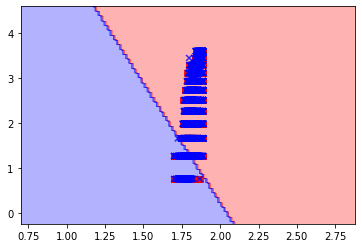

In [198]:
plot_decision_regions(X = X_train[['age', 'no_of_trainings']], y = y_train, classifier=lg)

In [76]:
X_train.head()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,department_Finance,department_HR,department_Legal,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Master's & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
6274,1,6.0,4.0,0.0,0,0,16.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7665,1,6.0,5.0,0.0,1,0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
202,1,10.0,5.0,0.0,1,0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0
2776,1,9.0,3.0,0.0,1,0,17.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
7175,3,11.0,5.0,8.0,1,0,8.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [26]:
X_train_cols = X_train.iloc[:, :2]
first_column = X_train_cols.iloc[:, 0]
first_column

6274    4.0
7665    5.0
202     5.0
2776    3.0
7175    5.0
       ... 
1099    3.0
2514    4.0
6637    1.0
2575    4.0
7336    4.0
Name: previous_year_rating, Length: 7468, dtype: float64

In [ ]:
# Setting some parameters that will be used in the plot
n_classes = 3
color_palette = plt.cm.coolwarm
plot_colors = "bwr" # blue, white and red, same as the coolwarm palette
plot_step = 0.02

plt.figure(figsize=(25, 12))

for pair_idx, pair in enumerate(sorted(unique_combinations)):
    # Only two corresponding features are taken each time
    X_train_cols = X_train[:, pair]

    # Creating and fitting the classifier to train data
    classifier = DecisionTreeClassifier(max_depth=4, 
                                        random_state=SEED).fit(X_train_cols, y_train)

    # Defining a grid of 5 columns and 3 rows 
    ax = plt.subplot(3, 5, pair_idx + 1)
    # Plotting the pairs decision boundaries
    DecisionBoundaryDisplay.from_estimator(classifier,
                                           X_train_cols,
                                           cmap=color_palette,
                                           response_method="predict",
                                           ax=ax,
                                           xlabel=data.feature_names[pair[0]],
                                           ylabel=data.feature_names[pair[1]],
                                           alpha = 0.5)

    # Plotting the training points according to y_train class colors
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X_train_cols[idx, 0],
                    X_train_cols[idx, 1],
                    c=color,
                    label=data.target_names[i],
                    cmap=color_palette,
                    edgecolor="black",
                    s=15)

plt.suptitle("Decision surface of decision trees trained on pairs of features", fontsize=14)
plt.legend(loc="lower right");

### Enhancing decision trees with deeper models

In [ ]:
SEED = 1
decision_tree = tree.DecisionTreeClassifier(max_depth = 6, random_state = SEED)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

In [ ]:
std_slc = StandardScaler()
std_slc

StandardScaler()

Here, we are using Decision Tree Classifier as a Machine Learning model to use GridSearchCV. So we have created an object dec_tree.

In [ ]:
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
dec_tree

DecisionTreeClassifier()

Pipeline will helps us by passing modules one by one through GridSearchCV for which we want to get the best parameters. So we are making an object pipe to create a pipeline for all the three objects std_scl, pca and dec_tree.

In [ ]:
pipe = Pipeline(steps=[('std_slc', std_slc),
                        ('pca', pca),
                        ('dec_tree', dec_tree)])

pipe

Pipeline(steps=[('std_slc', StandardScaler()), ('pca', PCA()),
                ('dec_tree', DecisionTreeClassifier())])

Now we have to define the parameters that we want to optimise for these three objects.
StandardScaler doesnot requires any parameters to be optimised by GridSearchCV.
Principal Component Analysis requires a parameter 'n_components' to be optimised. 'n_components' signifies the number of components to keep after reducing the dimension.

In [ ]:
n_components = list(range(1,X.shape[1]+1,1))
n_components

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53]

DecisionTreeClassifier requires two parameters 'criterion' and 'max_depth' to be optimised by GridSearchCV. So we have set these two parameters as a list of values form which GridSearchCV will select the best value of parameter.

In [ ]:
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]

Now we are creating a dictionary to set all the parameters options for different objects.

In [ ]:
parameters = dict(pca__n_components=n_components,
                    dec_tree__criterion=criterion,
                    dec_tree__max_depth=max_depth)

In [ ]:
clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X_train, y_train)

c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2940 fits failed out of a total of 3180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\user\anaconda3\lib\site-packages\sklearn\pipeline.py", line 416, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\user\anaconda3\li

GridSearchCV(estimator=Pipeline(steps=[('std_slc', StandardScaler()),
                                       ('pca', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [2, 4, 6, 8, 10, 12],
                         'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                               11, 12, 13, 14, 15, 16, 17, 18,
                                               19, 20, 21, 22, 23, 24, 25, 26,
                                               27, 28, 29, 30, ...]})

In [ ]:
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])

Best Criterion: entropy
Best max_depth: 6
Best Number Of Components: 4

DecisionTreeClassifier(criterion='entropy', max_depth=6)


We can also make a separate pipeline

In [ ]:
from sklearn.pipeline import make_pipeline

dt_model = make_pipeline(
    StandardScaler(),
    PCA(n_components=4),
    DecisionTreeClassifier(criterion='entropy', max_depth=6)
)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=4)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=6))])

In [ ]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_labeled_decision_regions(X, y, models):
    h = .02  # Step size in the mesh

    # Plot the decision boundary for each classifier
    for model in models:
        # Get the minimum and maximum values for the features
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1

        # Create a meshgrid
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

        # Flatten the meshgrid and make predictions
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Reshape the predictions to match the meshgrid shape
        Z = Z.reshape(xx.shape)

        # Plot the decision regions
        plt.contourf(xx, yy, Z, alpha=0.3)

    # Scatter plot of the instances
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', marker='o', s=70, linewidth=1)

    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()


In [ ]:
d


### Logistic Regression Model

In [ ]:
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Instatiate logreg
logreg = LogisticRegression(random_state=1)

# Fit logreg to the training set
logreg.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Plot out the decision tree results, after grid search

In [ ]:
import os
print(os.getcwd())

c:\Users\user\Documents\Machine-Learning-with-HR-Analytics


In [ ]:
pts = np.loadtxt('c:/Users/user/Documents/Machine-Learning-with-HR-Analytics/linpts.txt')

FileNotFoundError: c:\Users\user\Documents\Machine-Learning-with-HR-Analytics\linpts.txt not found.

In [ ]:
plot_decision_boundary

### Decision Tree with only Relevant features

In [ ]:
# Create Decision Tree Model
decision_tree1_2 = tree.DecisionTreeClassifier(max_depth = 2)
decision_tree1_2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

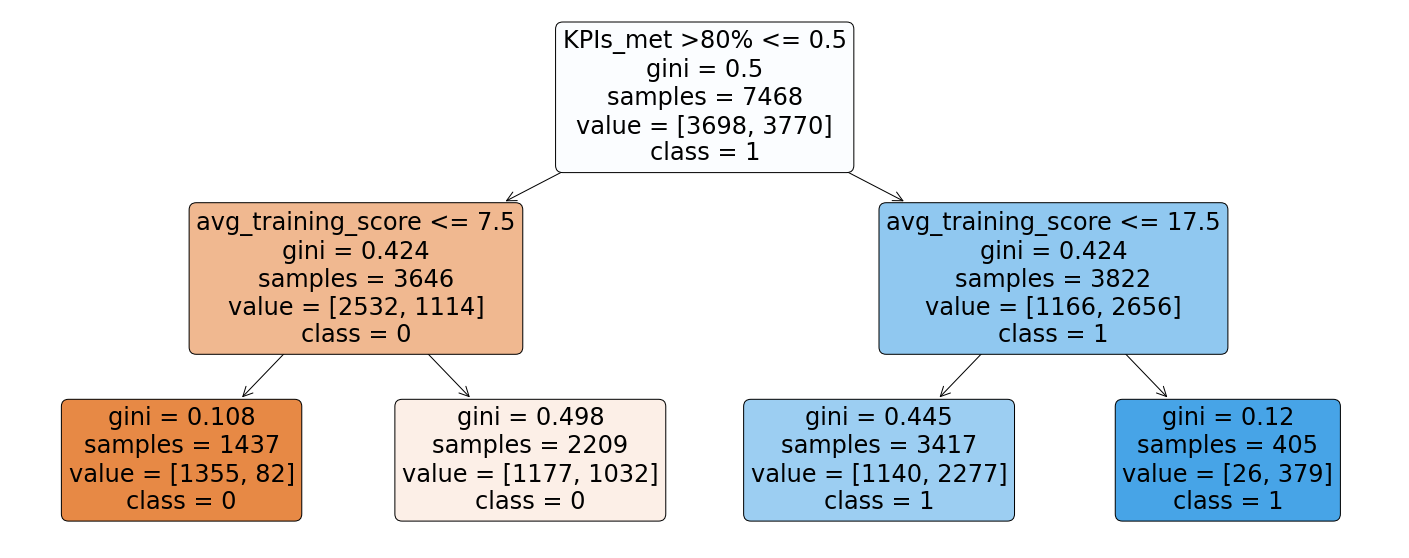

In [ ]:
plt.figure(figsize=(25, 10))
tree.plot_tree(decision_tree1_2,
               feature_names=feature_columns,
               class_names=['0', '1'],
               rounded=True,
               filled=True)
plt.savefig('tree1.png', format='png')
plt.show()


In [ ]:
#training acc
train_acc = decision_tree1_2.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the training accuracy is:  0.6946973754686663
the testing accuracy is:  0.686830835117773


### 1.3 Evaluate and Improve the Model(s)

In [ ]:
# Use GridSearch to find the best combination of model hyperparameters

dt = tree.DecisionTreeClassifier(max_depth = 2)

param_grid = { "criterion" : ["gini", "entropy"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10, 12, 16], 'max_depth' : [2,3,4,5,6,7]}

gs = GridSearchCV(dt, param_grid=param_grid, scoring='accuracy', cv= 10, n_jobs=-1)
# cv: number of partitions for cross validation
# n_jobs: number of jobs to run in parallel, -1 means using all processors

gs = gs.fit(X_train, y_train) # 

print(gs.best_score_)
print(gs.best_params_)

0.7716939249401538
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [ ]:
# Create Decision Tree using the best hyperparameters
decision_tree = tree.DecisionTreeClassifier(criterion='gini', max_depth = 3, min_samples_leaf = 1, min_samples_split =2, random_state=1)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

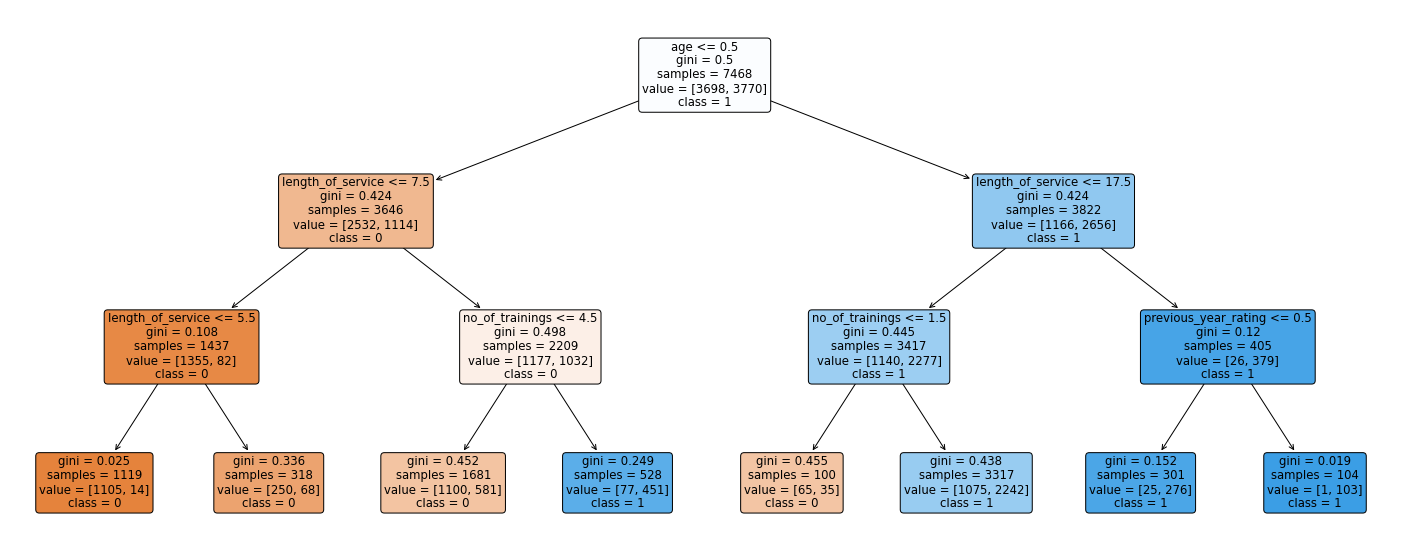

In [ ]:
plt.figure(figsize=(25,10))
tree.plot_tree(decision_tree,
              feature_names = list(hrAnalytics.drop(['is_promoted'], axis=1)),
                class_names = ['0', '1'],
                rounded = True,
                filled= True)
plt.savefig('tree2.png',format='png')
plt.show() 

In [ ]:
#Evaluate the Model
#training acc
train_acc = decision_tree.score(X_train, y_train)
print('the training accuracy is: ', train_acc)

the training accuracy is:  0.7487948580610605


In [ ]:
#testing acc
test_acc = decision_tree.score(X_test, y_test)
print('the testing accuracy is: ', test_acc)

the testing accuracy is:  0.7408993576017131


### Using filtered data

### Using Support Vector Machine (SVM)

In [ ]:
def plot_classifier(X, y, classifier, lims=None, ax=None, plot_title=None):
    """
    Visualize the decision boundary of a classifier.

    Parameters:
    - X: Feature matrix (pandas DataFrame or numpy array)
    - y: Target vector (numpy array)
    - classifier: Classifier object with a 'predict' method
    - lims: Limits for the plot (optional, tuple)
    - ax: Matplotlib AxesSubplot object (optional)
    - plot_title: Title for the plot (optional, str)
    """
    if ax is None:
        _, ax = plt.subplots()

    # Convert pandas DataFrame to numpy array if necessary
    if isinstance(X, pd.DataFrame):
        X = X.values

    # Plot the decision boundary
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k", marker="o")
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")

    # Add legend and labels
    ax.add_artist(legend1)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    if lims is not None:
        ax.set_xlim(lims[0], lims[1])
        ax.set_ylim(lims[2], lims[3])

    if plot_title:
        ax.set_title(plot_title)

    return ax


In [ ]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
X_train.columns

# plot_classifier(X_train, y_train, svm, lims=(11, 15, 0, 6))

# plt.show()

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [ ]:
import itertools

# Assuming X_train is your DataFrame and y_train is your target variable

# Selecting the features for visualization
selected_features = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
                      'KPIs_met >80%', 'awards_won?', 'avg_training_score',
                      'department_Finance', 'department_HR', 'department_Legal',
                      'department_Operations', 'department_Procurement', 'department_R&D',
                      'department_Sales & Marketing', 'department_Technology',
                      'region_region_10', 'region_region_11', 'region_region_12',
                      'region_region_13', 'region_region_14', 'region_region_15',
                      'region_region_16', 'region_region_17', 'region_region_18',
                      'region_region_19', 'region_region_2', 'region_region_20',
                      'region_region_21', 'region_region_22', 'region_region_23',
                      'region_region_24', 'region_region_25', 'region_region_26',
                      'region_region_27', 'region_region_28', 'region_region_29',
                      'region_region_3', 'region_region_30', 'region_region_31',
                      'region_region_32', 'region_region_33', 'region_region_34',
                      'region_region_4', 'region_region_5', 'region_region_6',
                      'region_region_7', 'region_region_8', 'region_region_9',
                      'education_Below Secondary', "education_Master's & above", 'gender_m',
                      'recruitment_channel_referred', 'recruitment_channel_sourcing']

# Get all possible combinations of two features
feature_combinations = list(itertools.combinations(selected_features, 2))

# Assuming svm is your SVM model
svm = SVC(kernel='linear')


In [ ]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X_train))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_, :]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

Number of original examples 7468


AttributeError: 'SVC' object has no attribute 'support_'

### Support Vector Machine with onyl relevant columns to target var

In [ ]:
# Train a linear SVM
from sklearn.svm import SVC
svm = SVC(kernel="linear")
svm.fit(X_train, y_train)
X_train.columns

# plot_classifier(X_train, y_train, svm, lims=(11, 15, 0, 6))

# plt.show()

Index(['previous_year_rating', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [ ]:
feature_columns

['previous_year_rating', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']

In [ ]:
import itertools

# Get all possible combinations of two features
feature_combinations = list(itertools.combinations(feature_columns, 2))

# Assuming svm is your SVM model
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
svm.decision_function(X_train)

array([-0.99960982,  1.00013941,  1.00013941, ..., -1.0003181 ,
        1.00016751, -0.99981531])

https://stackoverflow.com/questions/26261151/scikit-learn-linearsvc-how-to-get-support-vectors-from-the-trained-svm

In [ ]:
# Make a new data set keeping only the support vectors
print("Number of original examples", len(X_train))
print("Number of support vectors", len(svm.support_))
support_vectors = X_train.iloc[svm.support_, :]


Number of original examples 7468
Number of support vectors 4307


## 2. Airbnb

### 2.1 Load and Sample the data

In [ ]:
airbnb = pd.read_csv("airbnb_final.csv", index_col=0)  # Sets the first column as the index

In [ ]:
airbnb.head()

,neighbourhood,host_name,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,price
0,81.492537,76.000000,1,1,19.666667,-0.1,-1.038462,-0.152174,0.348837,-6.0,3.0,0.857143,83
1,153.969466,81.000000,1,4,9.666667,1.6,-0.519231,-0.173913,0.348837,-5.0,5.0,1.571429,81
2,81.492537,76.000000,1,1,0.333333,1.8,-0.673077,-0.152174,0.348837,-4.0,3.0,-2.000000,69
3,100.390625,170.222222,1,2,-0.222222,1.2,-0.769231,0.000000,0.308970,0.0,1.0,-0.571429,206
4,100.390625,170.222222,1,2,-0.222222,2.0,-0.634615,0.000000,0.315615,0.0,0.0,1.857143,94


In [ ]:
airbnb.describe()

,neighbourhood,host_name,room_type,neighbourhood_group,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,last_review_year,last_review_month,last_review_day,price
count,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000,7907.000000
mean,169.332996,169.332996,1.472746,3.550778,1.612228,1.080739,0.618220,0.494284,-0.170344,-0.315290,-0.189579,0.075954,169.332996
std,141.296594,222.936148,0.590728,1.027596,4.677180,2.970775,2.046053,0.902166,0.485449,0.784444,2.028348,1.023875,340.187599
min,46.250000,14.000000,0.000000,0.000000,-0.222222,-0.200000,-1.038462,-0.173913,-0.863787,-6.000000,-6.000000,-2.000000,0.000000
25%,151.442553,83.000000,1.000000,4.000000,-0.222222,-0.200000,-0.423077,-0.152174,-0.684385,0.000000,0.000000,-0.428571,65.000000
50%,164.977901,138.225000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000
75%,177.441341,196.866667,2.000000,4.000000,0.777778,0.800000,0.576923,0.847826,0.315615,0.000000,1.000000,0.571429,199.000000
max,10000.000000,10000.000000,2.000000,4.000000,110.777778,32.100000,23.942308,2.347826,0.348837,0.000000,5.000000,2.285714,10000.000000


In [ ]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7907 entries, 0 to 7906
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood                   7907 non-null   float64
 1   host_name                       7907 non-null   float64
 2   room_type                       7907 non-null   int64  
 3   neighbourhood_group             7907 non-null   int64  
 4   minimum_nights                  7907 non-null   float64
 5   number_of_reviews               7907 non-null   float64
 6   reviews_per_month               7907 non-null   float64
 7   calculated_host_listings_count  7907 non-null   float64
 8   availability_365                7907 non-null   float64
 9   last_review_year                7907 non-null   float64
 10  last_review_month               7907 non-null   float64
 11  last_review_day                 7907 non-null   float64
 12  price                           79

In [ ]:
# Set the "Survived" as target/model output and the rest features as model inputs
y_data_airbnb = airbnb['price']
x_data_airbnb = airbnb.drop(['price'], axis=1)

In [ ]:
# Split the data into training and testing data
X_train_airbnb, X_test_airbnb, y_train_airbnb, y_test_airbnb = train_test_split(x_data_airbnb, y_data_airbnb, test_size=0.2, random_state=2)

In [ ]:
X_train_airbnb.shape

(6325, 12)

In [ ]:
y_train_airbnb.shape

(6325,)

In [ ]:
y_train_airbnb.ravel()

array([450, 131,  44, ..., 119,  49, 669], dtype=int64)

### 2.2 Build the Model(s)

### Random Forest Regressor

In [ ]:
# Create Random Forest Model
rf_reg = RandomForestRegressor(max_depth=2, random_state=1, n_estimators=20)
# Y_train is a 1D array, use ravel() to change the shape of Y_train to (n_samples,) before feed it into fit function
rf_reg.fit(X_train_airbnb, y_train_airbnb.ravel()) 

RandomForestRegressor(max_depth=2, n_estimators=20, random_state=1)

In [ ]:
train_score = rf_reg.score(X_train_airbnb, y_train_airbnb)
train_mse = mean_squared_error(y_train_airbnb, rf_reg.predict(X_train_airbnb))
print("Training R^2:", train_score)
print("Training MSE:", train_mse)


Training R^2: 0.48785294774524246
Training MSE: 48913.880501978514


In [ ]:
predictions = rf_reg.predict(X_test_airbnb)

# 5. Interpret feature importances
feature_importances = rf_reg.feature_importances_
print("Feature importances:", feature_importances)

Feature importances: [0.11648581 0.68629095 0.         0.0169887  0.         0.01651808
 0.00816495 0.         0.0800767  0.         0.02935981 0.04611501]


In [ ]:
test_score = rf_reg.score(X_test_airbnb, y_test_airbnb)
test_mse = mean_squared_error(y_test_airbnb, rf_reg.predict(X_test_airbnb))
print("Training R^2:", test_score)
print("Training MSE:", test_mse)


Training R^2: 0.23666848356372983
Training MSE: 149930.32431974506


In [ ]:
# Task 3: Evaluate the Model using K-folds Cross validation
results = cross_validate(svmModel, X_train_airbnb, y_train_airbnb.ravel(), scoring=['neg_mean_squared_error', 'r2'], cv=5, return_train_score=True)

print('cross val training MSE:', -results['train_neg_mean_squared_error'].mean())
print('cross val testing MSE:', -results['test_neg_mean_squared_error'].mean())

print('cross val training R-squared:', results['train_r2'].mean())
print('cross val testing R-squared:', results['test_r2'].mean())


cross val training MSE: 53333.51308416899
cross val testing MSE: 54233.96370018229
cross val training R-squared: 0.4399832135875311
cross val testing R-squared: 0.4034443379368885


### Grid Search CV for Random Forest Regressor

https://stackoverflow.com/questions/43590489/gridsearchcv-random-forest-regressor-tuning-best-params


In [ ]:
def Grid_Search_CV_RFR(X_train, y_train):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import ShuffleSplit
    from sklearn.ensemble import RandomForestRegressor

    estimator = RandomForestRegressor()
    param_grid = { 
            "n_estimators"      : [10,20,30],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

    grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5)

    grid.fit(X_train, y_train)

    return grid.best_score_ , grid.best_params_

In [ ]:
for i in range(5):
    print("Loop: " , i)
    print("--------------")
    X_train_airbnb, X_test_airbnb, y_train_airbnb, y_test_airbnb = splitter_v2(tabla,1)
    best_score, best_params = Grid_Search_CV_RFR(X_train, y_train)  
    y_test , y_predict = RFR(X_train, X_test, y_train, y_test, best_params)
    print "Best Score:" ,best_score
    print "Best params:",best_params

In [ ]:
# Task 2: Build Model and Evaluate both training and testing MSE
from sklearn import svm
from sklearn.metrics import mean_squared_error

svmModel = svm.SVR(kernel='linear',gamma=0.001,C=0.1)
svmModel.fit(X_train_airbnb,y_train_airbnb.ravel())

print('training mean squared error: ', mean_squared_error(svmModel.predict(X_train_airbnb), y_train_airbnb))
print('testing mean squared error: ', mean_squared_error(svmModel.predict(X_test_airbnb), y_test_airbnb))

training mean squared error:  53424.097733943716
testing mean squared error:  113291.19049823751


In [ ]:
def RFR(X_train, X_test, y_train, y_test, best_params):
    from sklearn.ensemble import RandomForestRegressor
    estimator = RandomForestRegressor(n_jobs=-1).set_params(**best_params)
    estimator.fit(X_train,y_train)
    y_predict = estimator.predict(X_test)
    print("R2 score:", r2(y_test,y_predict))
    return y_test,y_predict

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# Add polynomial features
degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), SVR(kernel='poly', C=1, gamma='auto'))

# Fit the model
polyreg.fit(X_train_airbnb, y_train_airbnb.ravel())


ValueError: The dual coefficients or intercepts are not finite. The input data may contain large values and need to be preprocessed.

In [ ]:
# Evaluate the model
mse_train = mean_squared_error(polyreg.predict(X_train), Y_train)
mse_test = mean_squared_error(polyreg.predict(X_test), Y_test)

print('Training MSE:', mse_train)
print('Testing MSE:', mse_test)

### 2.3 Evaluate and Improve the Model(s)

### Sources:
DataCamp on Linear Classifiers in Python
https://campus.datacamp.com/courses/linear-classifiers-in-python/support-vector-machines?ex=3